## 6.4 Supervised Machine Learning: Regression

### This script will contain the following:

#### Importing Libraries
#### Importing Data
#### Data Cleaning
#### Data Prep for Regression
#### Regression Analysis
#### Results
#### Export Clean Dataframe

# 01. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically

%matplotlib inline

# 02. Import Data

In [3]:
# Path Creation
path = r'/Users/tyrasmussen/Desktop/08-2023 UFC Analysis'

In [4]:
# Import Main Dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_weight.pkl'))

# 03. Data Cleaning

In [5]:
df.columns

Index(['R_fighter', 'B_fighter', 'Referee_x', 'date_x', 'location', 'Winner_x',
       'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD',
       ...
       'Format', 'Referee_y', 'date_y', 'Year', 'City', 'State', 'Country',
       'Fight_type', 'Winner_y', 'Weight category'],
      dtype='object', length=187)

In [7]:
# Display all results
pd.set_option('display.max_columns', None)

In [9]:
df.head()

,R_fighter,B_fighter,Referee_x,date_x,location,Winner_x,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_REV,B_REV,R_CTRL,B_CTRL,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee_y,date_y,Year,City,State,Country,Fight_type,Winner_y,Weight category
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000000,0.000,0.420000,0.495000,0.330000,0.360000,0.500000,1.0000,0.000000,0.00,50.000000,20.000000,84.000000,45.000000,76.500000,41.000000,114.000000,64.000000,1.500000,1.000000,9.000000,6.500000,39.500000,11.000000,63.000000,27.500000,7.500000,7.000000,12.00000,9.000000,3.000000,2.000000,9.000000,8.500000,35.000000,12.500000,43.500000,17.500000,10.50000,4.500000,4.000000,3.000000,4.50000,3.000000,36.500000,24.500000,34.000000,277.500000,531.50000,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135.0,1.00000,0.000000,0.500000,0.460000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.000000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.000000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.00000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0

In [10]:
df.shape

(3645, 187)

### Columns

In [15]:
# Rename columns
df.rename(columns = {'Referee_x' : 'Referee', 'date' : 'Date', 'Winner_x' : 'Winner'}, inplace = True)

In [17]:
df.head()

,R_fighter,B_fighter,Referee,Date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_REV,B_REV,R_CTRL,B_CTRL,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee_y,date_y,Year,City,State,Country,Fight_type,Winner_y,Weight category
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000000,0.000,0.420000,0.495000,0.330000,0.360000,0.500000,1.0000,0.000000,0.00,50.000000,20.000000,84.000000,45.000000,76.500000,41.000000,114.000000,64.000000,1.500000,1.000000,9.000000,6.500000,39.500000,11.000000,63.000000,27.500000,7.500000,7.000000,12.00000,9.000000,3.000000,2.000000,9.000000,8.500000,35.000000,12.500000,43.500000,17.500000,10.50000,4.500000,4.000000,3.000000,4.50000,3.000000,36.500000,24.500000,34.000000,277.500000,531.50000,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135.0,1.00000,0.000000,0.500000,0.460000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.000000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.000000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.00000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.00000

In [20]:
# Drop duplicate columns
df = df.drop(columns = ['Referee_y'])

In [21]:
df = df.drop(columns = ['date_y'])

In [22]:
df = df.drop(columns = ['Winner_y'])

In [23]:
df.head()

,R_fighter,B_fighter,Referee,Date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_REV,B_REV,R_CTRL,B_CTRL,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Year,City,State,Country,Fight_type,Weight category
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000000,0.000,0.420000,0.495000,0.330000,0.360000,0.500000,1.0000,0.000000,0.00,50.000000,20.000000,84.000000,45.000000,76.500000,41.000000,114.000000,64.000000,1.500000,1.000000,9.000000,6.500000,39.500000,11.000000,63.000000,27.500000,7.500000,7.000000,12.00000,9.000000,3.000000,2.000000,9.000000,8.500000,35.000000,12.500000,43.500000,17.500000,10.50000,4.500000,4.000000,3.000000,4.50000,3.000000,36.500000,24.500000,34.000000,277.500000,531.50000,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135.0,1.00000,0.000000,0.500000,0.460000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.000000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.000000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.00000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.0000

### Missing Values

In [25]:
# Check for missing values
df.isnull().sum()
# No missing values

R_fighter          0
B_fighter          0
Referee            0
Date               0
location           0
                  ..
City               0
State              0
Country            0
Fight_type         0
Weight category    0
Length: 184, dtype: int64

### Duplicates

In [26]:
dups = df.duplicated()

In [28]:
dups.shape
# No duplicates

(3645,)

### Extreme Values Check

/var/folders/l9/n_0jq3zj66l9v7k98dd7cpqc0000gn/T/ipykernel_15108/3767789986.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['R_Weight_lbs'], bins = 25)


<Axes: xlabel='R_Weight_lbs', ylabel='Density'>

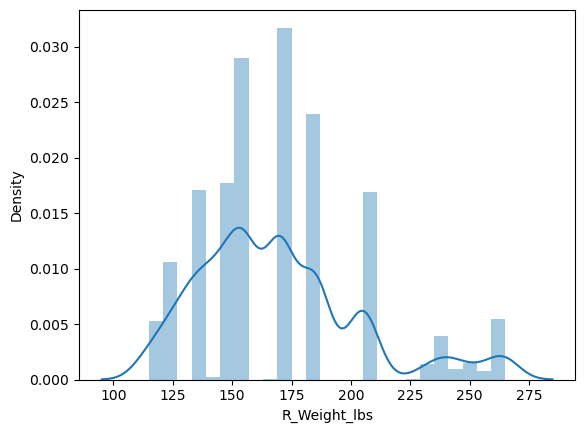

In [34]:
sns.distplot(df['R_Weight_lbs'], bins = 25)

/var/folders/l9/n_0jq3zj66l9v7k98dd7cpqc0000gn/T/ipykernel_15108/3880645812.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['R_total_time_fought(seconds)'], bins = 25)


<Axes: xlabel='R_total_time_fought(seconds)', ylabel='Density'>

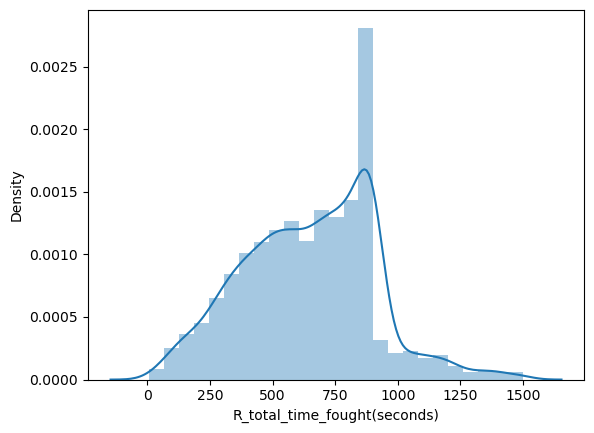

In [42]:
sns.distplot(df['R_total_time_fought(seconds)'], bins = 25)

/var/folders/l9/n_0jq3zj66l9v7k98dd7cpqc0000gn/T/ipykernel_15108/1777635974.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['B_Weight_lbs'], bins = 25)


<Axes: xlabel='B_Weight_lbs', ylabel='Density'>

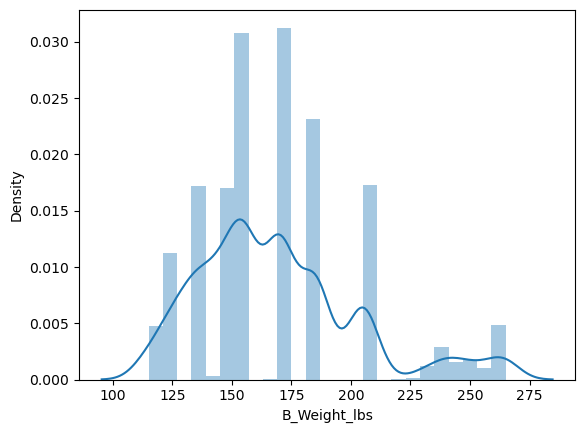

In [35]:
sns.distplot(df['B_Weight_lbs'], bins = 25)

/var/folders/l9/n_0jq3zj66l9v7k98dd7cpqc0000gn/T/ipykernel_15108/2841409909.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['B_total_time_fought(seconds)'], bins = 25)


<Axes: xlabel='B_total_time_fought(seconds)', ylabel='Density'>

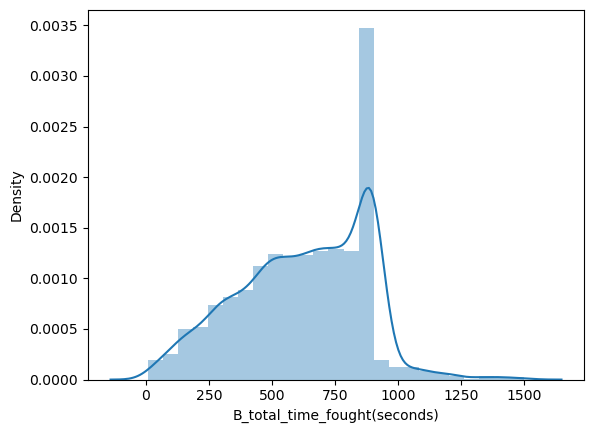

In [43]:
sns.distplot(df['B_total_time_fought(seconds)'], bins = 25)

In [36]:
df['R_Weight_lbs'].mean()

168.9459533607682

In [37]:
df['R_Weight_lbs'].median()

170.0

In [38]:
df['R_Weight_lbs'].max()

265.0

In [39]:
df['B_Weight_lbs'].mean()

168.60164609053498

In [40]:
df['B_Weight_lbs'].median()

170.0

In [41]:
df['B_Weight_lbs'].max()

265.0

In [44]:
df['R_total_time_fought(seconds)'].mean()

648.1700592909696

In [45]:
df['R_total_time_fought(seconds)'].median()

665.5497722625732

In [46]:
df['R_total_time_fought(seconds)'].max()

1500.0

In [47]:
df['B_total_time_fought(seconds)'].mean()

623.9051425612096

In [48]:
df['B_total_time_fought(seconds)'].median()

649.125

In [49]:
df['B_total_time_fought(seconds)'].max()

1500.0

## Hypothesis

### The higher the weight of a fighter, the shorter the length of the fight.

# 04. Data Prep for Regression

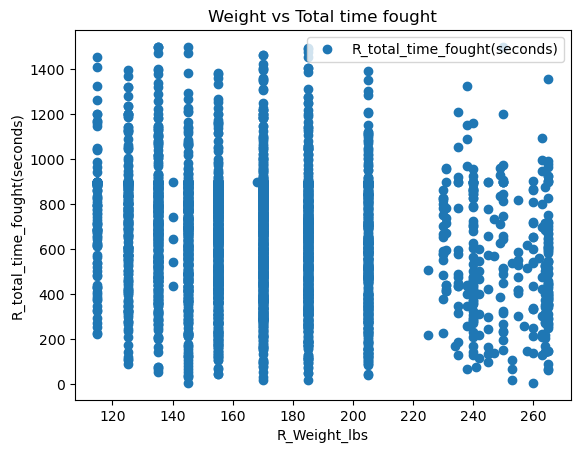

In [50]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'R_Weight_lbs', y='R_total_time_fought(seconds)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Weight vs Total time fought')  
plt.xlabel('R_Weight_lbs')  
plt.ylabel('R_total_time_fought(seconds)')  
plt.show()

In [52]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df['R_Weight_lbs'].values.reshape(-1,1)
y = df['R_total_time_fought(seconds)'].values.reshape(-1,1)

In [53]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 05. Regression Analysis

In [54]:
# Create the regression object
regression = LinearRegression()

In [55]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [56]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

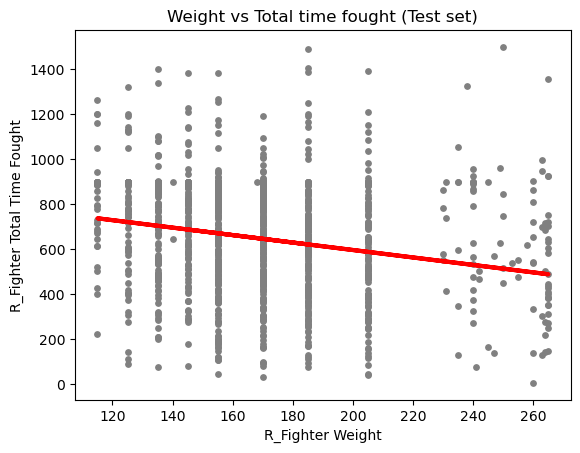

In [57]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Weight vs Total time fought (Test set)')
plot_test.xlabel('R_Fighter Weight')
plot_test.ylabel('R_Fighter Total Time Fought')
plot_test.show()

### After viewing the regression line on the test data, it appears that the fit is not strong as there are many points far from the regression line.

In [58]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [59]:
# Print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.65791894]]
Mean squared error:  65800.93389067997
R2 score:  0.02529391330111963


In [60]:
y_predicted

array([[688.1346772 ],
       [688.1346772 ],
       [671.5554878 ],
       ...,
       [671.5554878 ],
       [588.65954083],
       [621.81791962]])

In [61]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

In [62]:
data.head(30)

,Actual,Predicted
0,1383.485467,688.134677
1,285.500000,688.134677
2,365.875000,671.555488
3,678.976608,646.686704
4,495.000000,688.134677
5,514.500000,688.134677
6,802.163086,704.713867
7,521.878052,588.659541
8,655.383789,671.555488
9,782.500000,721.293056


# 06. Results

### Unfortunately, after viewing the regression line, the difference between the predicted values and actual y values, and the mean squared error and R2 score, it has been determined that a linear relationship does not exist between the two variables. I do think that this model could have bias such as exclusion bias for other factors that are important in the duration of a fight, such as the fighter's significant strike percentage and takedowns per fight. It is important that new hypotheses are created and different variables are tested to find a strong model.

# 07. Export Clean Dataframe

In [63]:
# Export data to pkl
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_CLEAN.pkl'))